In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
df_registered = pd.read_csv('registrado.csv')
df_registered.set_index('Registrado (mil ton.)', inplace=True)
df_registered = df_registered.T
df_registered

Registrado (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,11.188,32.388,9.691,42.731,291.428,151.601,48.990,111.377,178.918,70.660,...,57.142,226.547,232.609,46.081,32.559,9.908,252.700,860.232,36.567,31.615
2019-02,10.381,30.378,7.378,36.026,249.430,129.537,44.726,98.614,161.936,50.796,...,46.283,228.500,195.364,38.703,24.910,10.723,246.146,773.607,30.849,30.275
2019-03,8.080,30.641,6.970,34.609,241.612,105.236,44.491,94.022,173.792,47.834,...,43.390,223.896,205.690,36.037,28.713,10.625,255.873,790.146,31.021,29.568
2019-04,11.154,32.337,7.612,40.787,252.303,110.835,43.901,91.546,176.627,45.327,...,40.824,234.132,231.354,38.430,32.660,10.593,273.299,886.929,31.437,26.940
2019-05,12.508,36.405,8.442,39.823,281.912,127.925,55.019,95.674,207.991,54.032,...,55.063,207.586,236.711,44.471,31.635,10.681,270.918,941.600,31.533,35.910
2019-06,12.126,22.499,8.835,39.957,200.213,127.138,50.942,88.927,185.784,60.657,...,56.474,228.583,215.360,37.884,35.142,7.887,256.605,817.301,26.431,33.954
2019-07,14.496,27.961,11.251,52.048,270.511,157.128,63.992,105.688,234.176,67.250,...,68.133,234.565,258.015,51.585,36.419,9.751,303.526,957.289,25.978,37.983
2019-08,16.723,32.378,11.342,53.567,281.466,164.440,64.127,104.711,226.996,70.773,...,68.642,249.519,244.870,54.306,40.300,9.654,299.284,978.990,29.860,40.046
2019-09,15.253,32.582,13.110,46.239,285.535,140.298,60.822,97.530,218.141,67.010,...,64.741,230.086,225.410,52.511,35.493,9.422,284.550,906.956,39.045,32.647
2019-10,16.531,42.703,13.195,51.066,328.259,168.407,65.182,99.651,234.939,81.128,...,71.269,233.136,252.849,59.472,38.489,11.160,307.576,980.948,45.213,39.065


In [51]:
df_previsto = pd.read_csv('previsto.csv')
df_previsto.set_index('Previsto (mil ton.)', inplace=True)
df_previsto = df_previsto.T
df_previsto

Previsto (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,10.209281,29.815975,9.570232,44.506771,256.644653,151.802322,45.292465,97.359596,188.897842,65.736679,...,64.131920,225.152054,220.006790,46.915756,29.369425,7.445718,255.374893,853.990173,28.523083,27.859619
2019-02,10.387845,30.884338,9.484259,44.575142,248.618271,151.804459,47.103382,98.684288,191.360580,71.687729,...,63.808678,234.840317,221.383682,47.325531,28.523489,7.456687,260.267426,853.990540,29.278067,27.635132
2019-03,11.237919,31.712021,9.731879,44.588985,246.242310,151.793320,51.659069,97.290672,190.861725,73.467140,...,64.176888,238.273148,222.776505,47.225376,28.000050,7.461952,255.986938,853.990479,30.381056,28.526030
2019-04,12.727527,32.346962,9.688583,44.596600,257.164368,151.788498,52.185165,98.416870,191.553131,75.945351,...,64.425407,238.135452,223.018097,46.981659,27.810148,7.472434,258.149261,853.991089,30.560404,30.363777
2019-05,14.706620,32.994236,9.931500,44.612267,250.782806,151.790543,52.503571,97.804581,192.602463,80.043686,...,64.518265,239.448105,223.584915,47.008091,27.873070,7.481174,259.904205,853.991760,30.712545,33.436947
2019-06,15.533937,33.755295,10.099527,44.639572,261.559448,151.792313,55.697678,98.551880,191.629074,84.276543,...,64.399445,238.714264,223.976151,47.108250,27.914530,7.466317,260.652588,853.992981,33.068855,37.234165
2019-07,15.701231,33.372272,10.199181,44.586185,241.205109,151.788330,51.722771,96.626564,194.579239,82.386841,...,63.786072,236.223251,223.421326,46.664909,28.585161,7.471210,255.966995,853.989380,31.114649,39.284897
2019-08,15.602471,33.897724,10.290517,44.629814,272.003601,151.797546,53.547409,99.718201,192.625519,86.865730,...,63.308067,231.090836,222.821213,47.109531,29.463400,7.470089,266.014221,853.988464,31.574812,40.893402
2019-09,15.027325,34.957603,10.376319,44.672375,265.089783,151.807404,64.115906,97.455933,196.398788,88.306450,...,63.259331,236.806183,226.880798,47.505623,29.531805,7.445114,261.470886,853.990234,33.627266,42.476547
2019-10,14.398450,35.288647,10.485200,44.655651,278.882019,151.809219,64.761971,98.537491,201.075653,87.448128,...,62.694878,239.746719,225.550919,47.274311,29.509825,7.435028,262.823608,853.990662,32.117191,42.538090


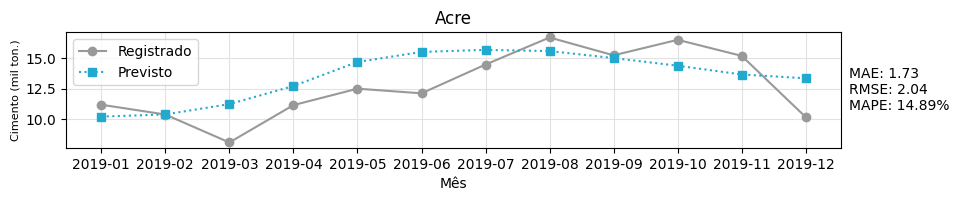

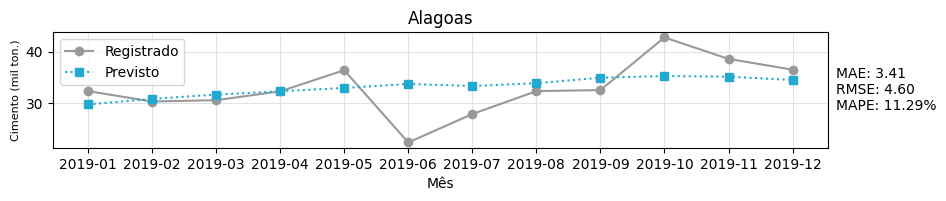

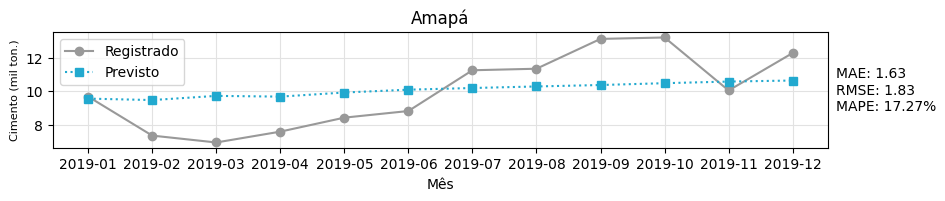

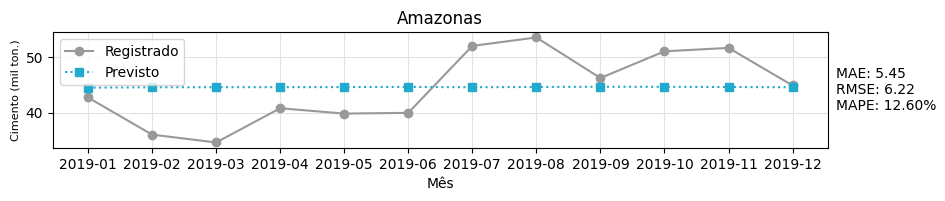

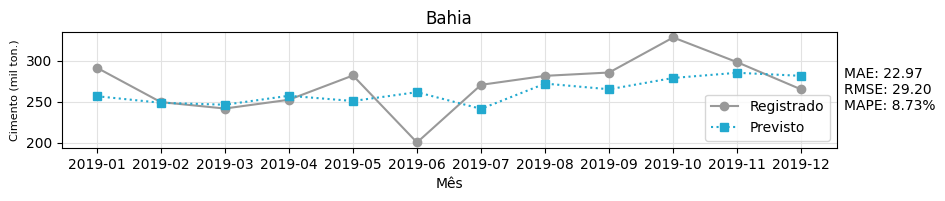

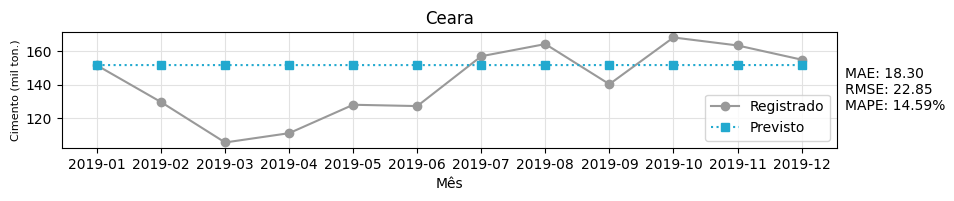

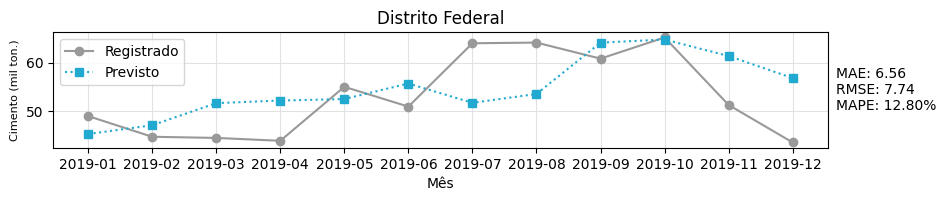

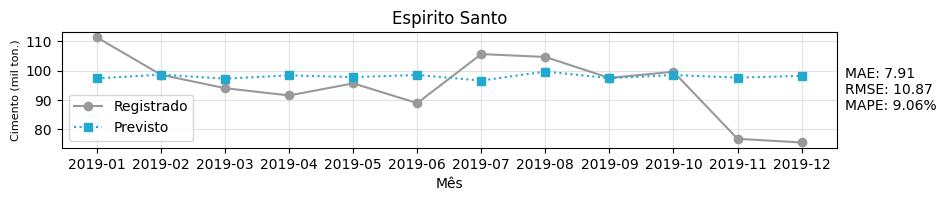

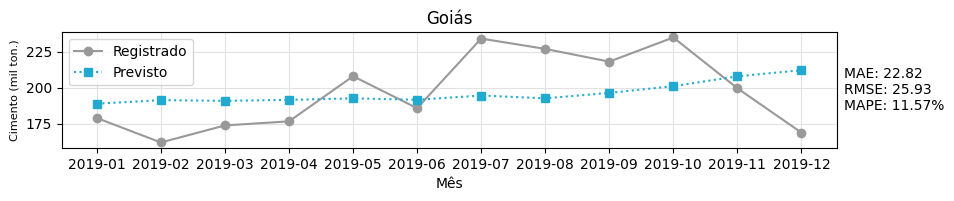

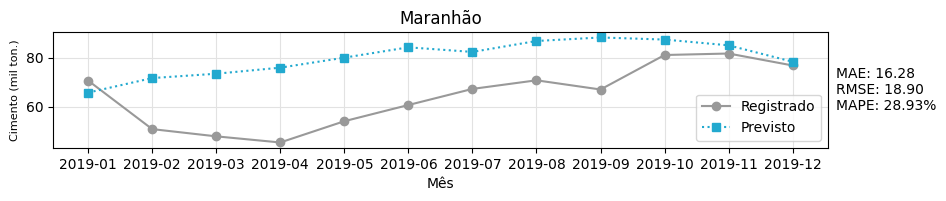

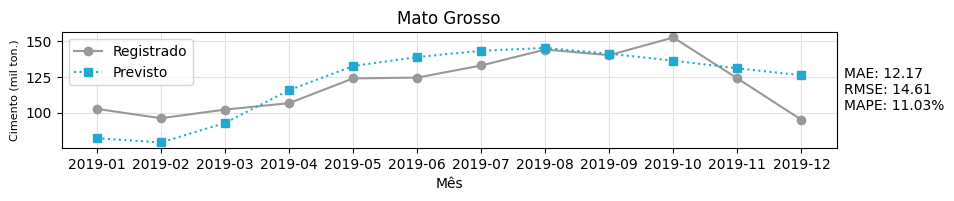

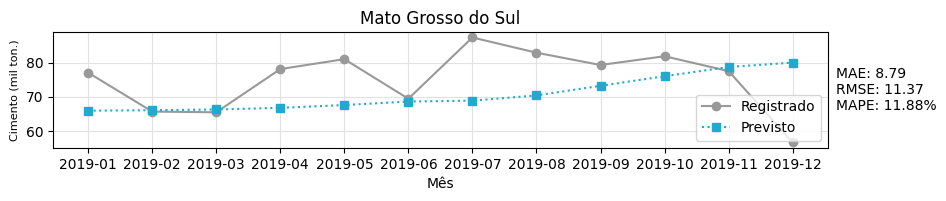

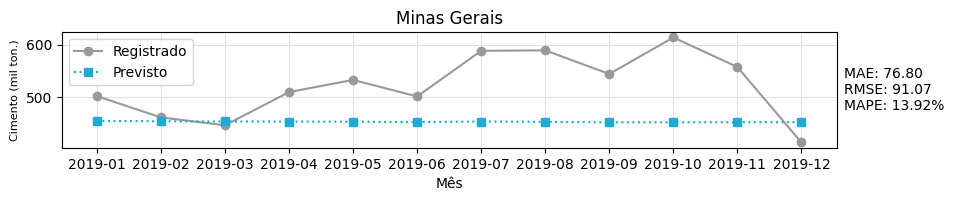

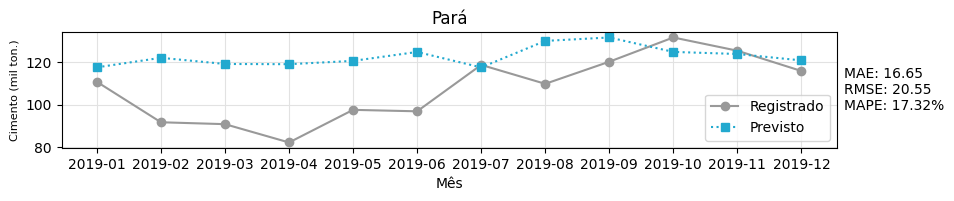

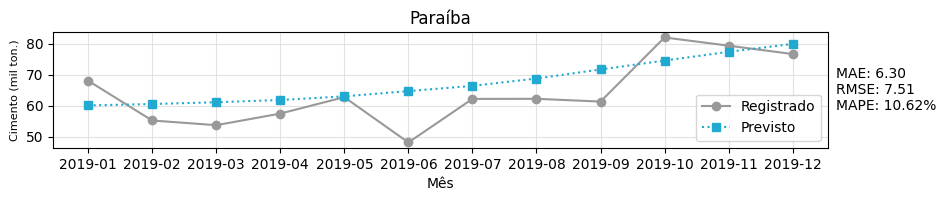

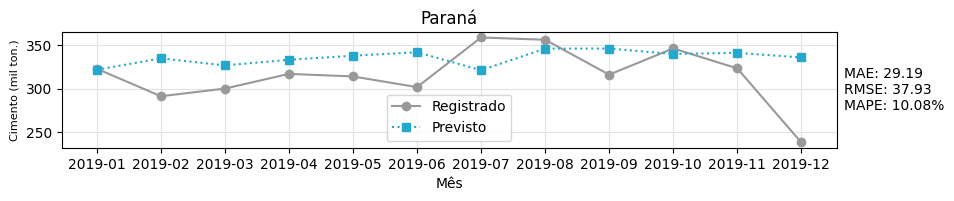

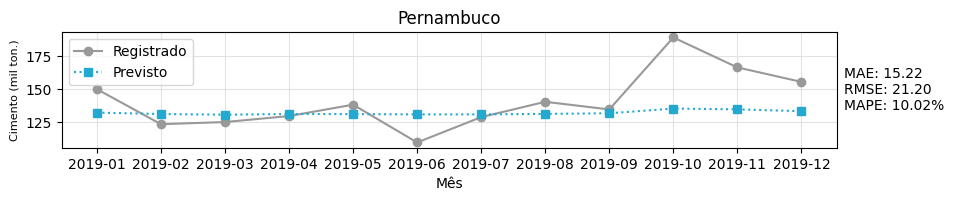

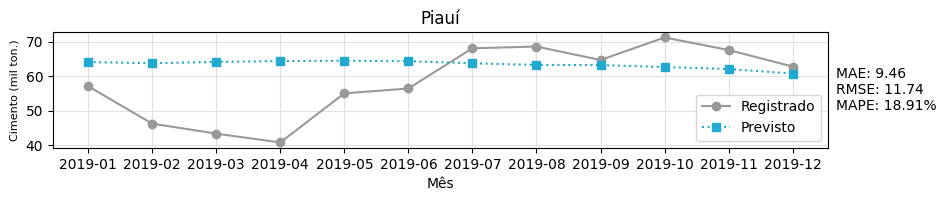

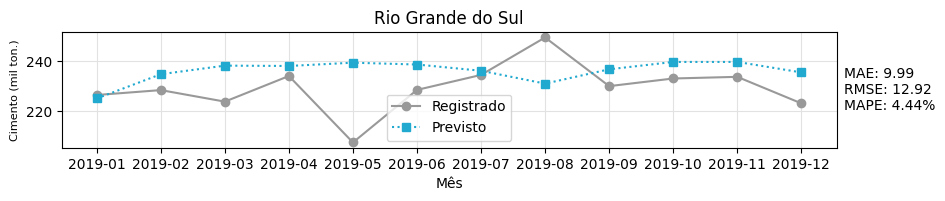

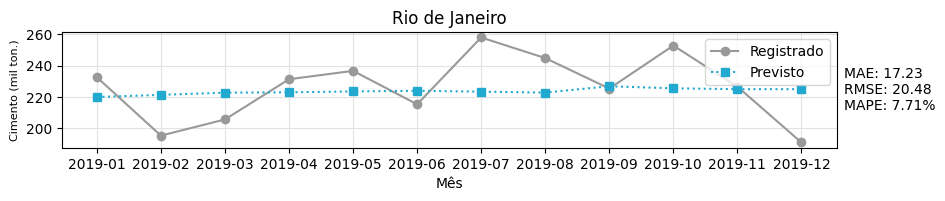

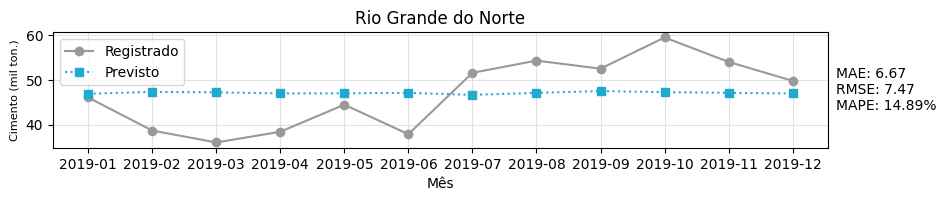

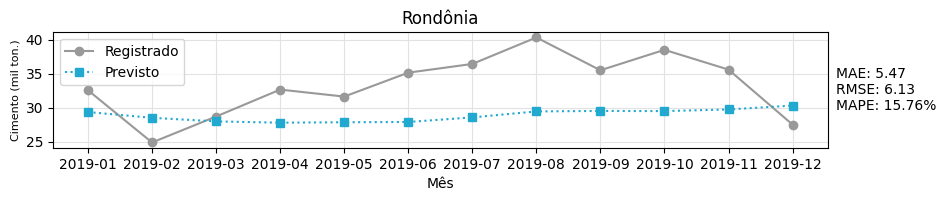

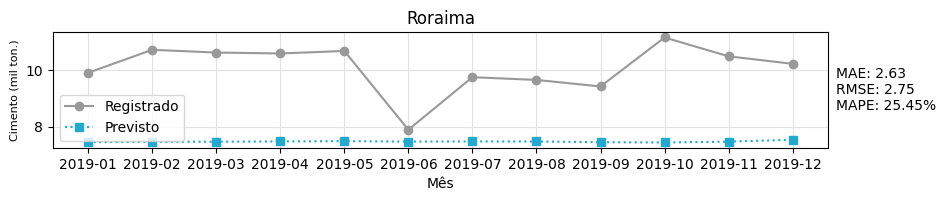

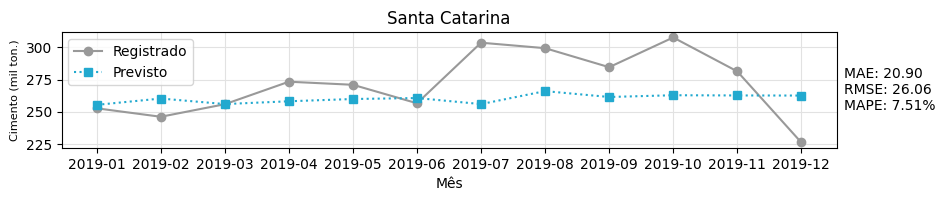

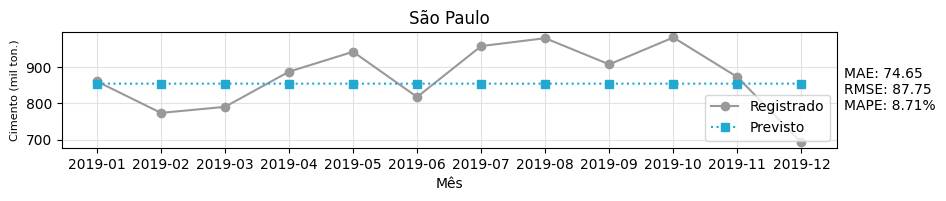

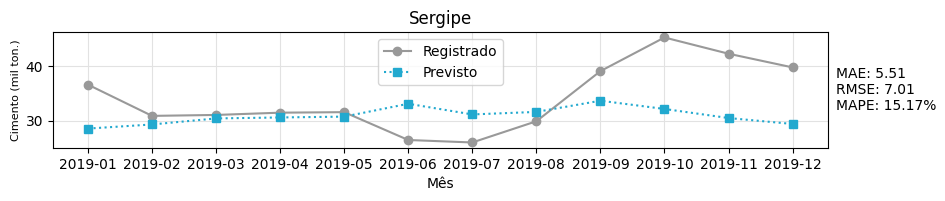

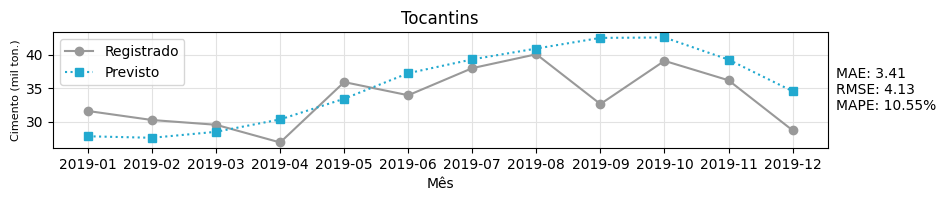

In [52]:
def plot_time_series(df_registered, df_previsto):
    states = df_registered.columns  

    for state in states:
        plt.figure(figsize=(10, 1.5))
        plt.plot(df_registered.index, df_registered[state], 
                 label='Registrado', marker='o', color='#999999') 
        plt.plot(df_previsto.index, df_previsto[state], 
                 label='Previsto', marker='s', linestyle='dotted', color='#22a9cf') 

        actual = df_registered[state]
        predicted = df_previsto[state]

        mae = mean_absolute_error(actual, predicted)
        rmse = mean_squared_error(actual, predicted, squared=False)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        info_text = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%' 

        plt.text(1.01, 0.5, info_text, transform=plt.gca().transAxes, 
                 fontsize=10, verticalalignment='center')

        plt.xlabel('Mês', fontsize=10)  
        plt.ylabel('Cimento (mil ton.)', fontsize=8) 
        plt.title(f'{state}')
        plt.legend()
        plt.grid(True, color='#E2E2E2') 
        plt.show()


plot_time_series(df_registered, df_previsto)

In [53]:
def plot_error_distribution(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    all_errors = errors.values.flatten()
    ranges = [float('-inf'), -50, -30, -10, 10, 30, 50, float('inf')]
    error_counts = pd.cut(all_errors, ranges).value_counts().sort_index()
    labels = ['< -50%', '-50% to -30%', '-30% to -10%', '-10% to 10%', '10% to 30%', '30% to 50%', '> 50%']

    plt.figure(figsize=(8, 6))
    bars = plt.barh(labels, error_counts, color='#22a9cf')
    plt.xlabel('Número de previsões')
    plt.ylabel('Intervalo de erros')
    plt.title('Distribuição agregada de erros')
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().spines['right'].set_visible(False)

    for bar, count in zip(bars, error_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{(count / sum(error_counts)) * 100:.1f}%", 
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

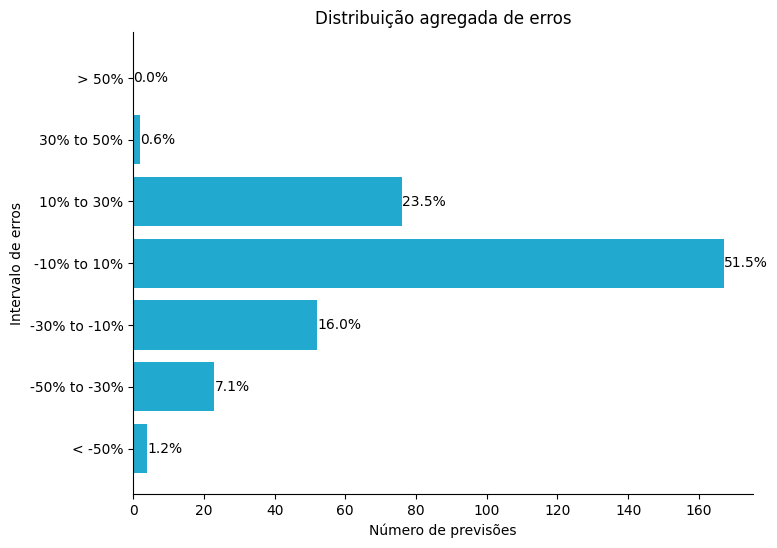

In [54]:
plot_error_distribution(df_registered, df_previsto)

In [55]:
def calculate_errors_summary(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    
    rmse_values = []
    mae_values = []
    mape_values = []

    for column in df_registered.columns:
        actual = df_registered[column]
        predicted = df_previsto[column]

        rmse = mean_squared_error(actual, predicted, squared=False)
        mae = mean_absolute_error(actual, predicted)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        rmse_values.append(round(rmse,2))
        mae_values.append(round(mae,2))
        mape_values.append(round(mape,2))

    summary = {
        'RMSE': rmse_values,
        'MAE': mae_values,
        'MAPE': mape_values
    }

    summary_df = pd.DataFrame(summary, index=df_registered.columns)
    mean_row = {
        'RMSE': round(sum(rmse_values) / len(rmse_values), 2),
        'MAE': round(sum(mae_values) / len(mae_values), 2),
        'MAPE': round(sum(mape_values) / len(mape_values), 2)
    }
    summary_df.loc['Mean'] = mean_row  

    return summary_df

In [56]:
sumario_erro = calculate_errors_summary(df_registered, df_previsto)
sumario_erro

,RMSE,MAE,MAPE
Registrado (mil ton.),,,
Acre,2.04,1.73,14.89
Alagoas,4.60,3.41,11.29
Amapá,1.83,1.63,17.27
Amazonas,6.22,5.45,12.60
Bahia,29.20,22.97,8.73
Ceara,22.85,18.30,14.59
Distrito Federal,7.74,6.56,12.80
Espirito Santo,10.87,7.91,9.06
Goiás,25.93,22.82,11.57
